In [ ]:
#EJ1

In [6]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets

boston=datasets.load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['TARGET']=boston.target
boston_df.head() # estructura de nuestro dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
rl=LinearRegression() # Creando el modelo.
rl.fit(boston.data,boston.target) # ajustando el modelo
# haciendo las predicciones
predicciones=rl.predict(boston.data)
predicciones_df=pd.DataFrame(predicciones,columns=['Pred'])
predicciones_df.head()# predicciones de las primeras 5 lineas

,Pred
0,30.003843
1,25.025562
2,30.567597
3,28.607036
4,27.943524


In [8]:
# Calculando el desvio
np.mean(boston.target-predicciones)

3.033146856209123e-15

In [ ]:
#EJ2

In [5]:
# Creando un dataset de ejemplo 
from sklearn.datasets import make_classification
X, y=make_classification(n_samples=1000,n_features=4)
#Importando el modelo
from sklearn.linear_model import LogisticRegression
rlog=LogisticRegression()# Creando el modelo

# Dividiendo el dataset en entrenamiento y evaluacion
X_entrenamiento=X[:-200]
X_evaluacion=X[-200:]
y_entrenamiento=y[:-200]
y_evaluacion=y[-200:]

rlog.fit(X_entrenamiento,y_entrenamiento) #ajustando el modelo
# Realizando las predicciones
y_predic_entrenamiento=rlog.predict(X_entrenamiento)
y_predic_evaluacion=rlog.predict(X_evaluacion)

# Verificando la exactitud del modelo
entrenamiento= (y_predic_entrenamiento==y_entrenamiento).sum().astype(float)/y_entrenamiento.shape[0]
print("sobre datos de entrenamiento: {0:.2f}".format(entrenamiento))
evaluacion=(y_predic_evaluacion==y_evaluacion).sum().astype(float)/y_evaluacion.shape[0]
print("sobre datos de evaluación: {0:.2f}".format(evaluacion))

sobre datos de entrenamiento: 0.88
sobre datos de evaluación: 0.92


In [ ]:
#EJ3

In [12]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets
# Creando un dataset de ejemplo
X,y=datasets.make_classification(1000,20,n_informative=3)
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
ad=DecisionTreeClassifier(criterion='entropy',max_depth=5)# Creando el modelo
ad.fit(X,y)# Ajustando el modelo
#generando archivo para graficar el arbol
with open("mi_arbol.dot",'w') as archivo_dot:
    tree.export_graphviz(ad,out_file=archivo_dot)
# utilizando el lenguaje dot para graficar el arbol.   
!dot -Tjpeg mi_arbol.dot -o arbol_decision.jpeg

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#El algoritmo crea un documento word (con la red neuronal), el cual se encuentra en la misma carpeta que el codigo 
#(OneDrive-Documentos-PYTHON-Analisis de Negocio con Big data para la Industria)

In [13]:
import os
os.getcwd()

'C:\\Users\\eduma\\OneDrive\\Documentos\\Python-Analisis de negocio con Big Data'

In [14]:
#EJ4

In [15]:
# importando pandas, numpy y matplotlib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets 
# Creando un dataset de ejemplo
X,y=datasets.make_classification(1000) # Importando el random forest
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier() # Creando el modelo
rf.fit(X,y)# Ajustando el modelo
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((y==rf.predict(X)).mean()))

precisión del modelo:  1.00


In [17]:
#EJ4

C:\Users\eduma\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


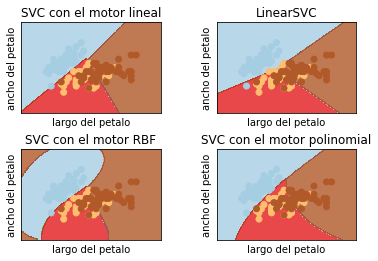

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets
# importanto SVM
from sklearn import svm
# importando el dataset iris
iris=datasets.load_iris()
X=iris.data[:,:2]# solo tomamos las primeras 2 características
y=iris.target
h=.02# tamaño de la malla del grafico
# Creando el SVM con sus diferentes métodos
C=1.0# parametro de regulacion SVM 
svc=svm.SVC(kernel='linear',C=C).fit(X,y)
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,y)
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,y)
lin_svc=svm.LinearSVC(C=C).fit(X,y)

# crear el area para graficar
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# titulos de los graficos
titles=['SVC con el motor lineal',
        'LinearSVC',
        'SVC con el motor RBF',
        'SVC con el motor polinomial']

for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    
    # Graficando tambien los puntos de datos
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()    

In [19]:
#EJ5

In [20]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets
# Creando el dataset iris
iris=datasets.load_iris()
X=iris.data
y=iris.target
# importando KNN 
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=10)# Creando el modelo con 10 vecinos
knnr.fit(X,y)# Ajustando el modelo
# Verificando el error medio del modelo
print("El error medio del modelo es: {:.2f}".format(np.power(y-knnr.predict(X),2).mean()))

El error medio del modelo es: 0.02


In [21]:
#EJ7

In [22]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importando los datasets de sklearn
from sklearn import datasets
# Creando el dataset iris
iris=datasets.load_iris()
X=iris.data
y=iris.target
# importando KNN 
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=10)# Creando el modelo con 10 vecinos
knnr.fit(X,y)# Ajustando el modelo
# Verificando el error medio del modelo
print("El error medio del modelo es: {:.2f}".format(np.power(y-knnr.predict(X),2).mean()))

El error medio del modelo es: 0.02
